# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
#!pip install folium

In [1]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [4]:
!pip install tqdm --upgrade

  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.59.0
    Uninstalling tqdm-4.59.0:
      Successfully uninstalled tqdm-4.59.0


## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('trainhw2.csv')

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [4]:
df = df.drop(['dropoff_datetime'], axis = 1)

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


In [8]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

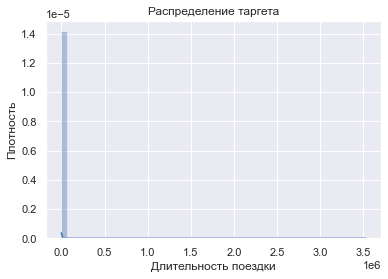

In [9]:
sns.distplot(df['trip_duration'])
plt.title("Распределение таргета")
plt.xlabel("Длительность поездки")
plt.ylabel("Плотность")
plt.show()

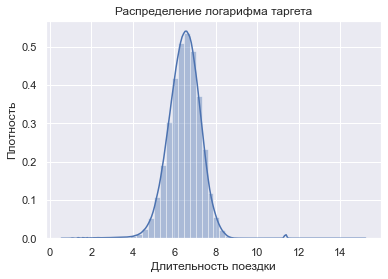

In [10]:
sns.distplot(np.log1p(df['trip_duration']))
plt.title("Распределение логарифма таргета")
plt.xlabel("Длительность поездки")
plt.ylabel("Плотность")
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Её распределение логнормально с цетром в ~$\ln(6.5)$, и есть какие то супер выбросы (какие то поездки длились ОГРОМЕННОЕ кол-во времени)

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Кажется, что это было сделано как раз в предположении, что распределение целевой переменной логнормально, чтобы мы как будто брали RMSE от двух объектов, которые распределенеы нормально. К тому же, если мы используем RMSE, то сильнее штрафуем модель, если её предсказание меньше реального ответа, и это логично, ведь нам лучше сказать клиенту, что ему ехать чуть дольше, чем чуть меньше.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

Обозначим за $w_0$ вектор, полученные оптимизацней RMSLE для $a$, a $w_1$ - вектор, полученный при оптимизации MSE для $\hat{a}$

$w_0 = \arg\min\limits_w \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(w^Tx_i) + 1)}\big)^2}$ = |Делаем непрерывное монотонное преобразование| = $
\arg\min\limits_w \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \log{(\exp(w^Tx_i) - 1) + 1)}\big)^2} = \arg\min\limits_w \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - w^Tx_i\big)^2} = w_1$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

Чорт, я уже рисовал логарифм, но ладно, сделаем ещё раз.

In [11]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

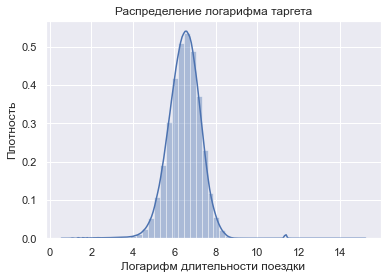

In [12]:
sns.distplot(df['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.xlabel("Логарифм длительности поездки")
plt.ylabel("Плотность")
plt.show()

In [13]:
df.drop('trip_duration', axis=1, inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [15]:
best_const = df['log_trip_duration'].mean()
const_score = np.sqrt(((df['log_trip_duration'] - best_const)**2).mean())
const_score

0.7957592365412156

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

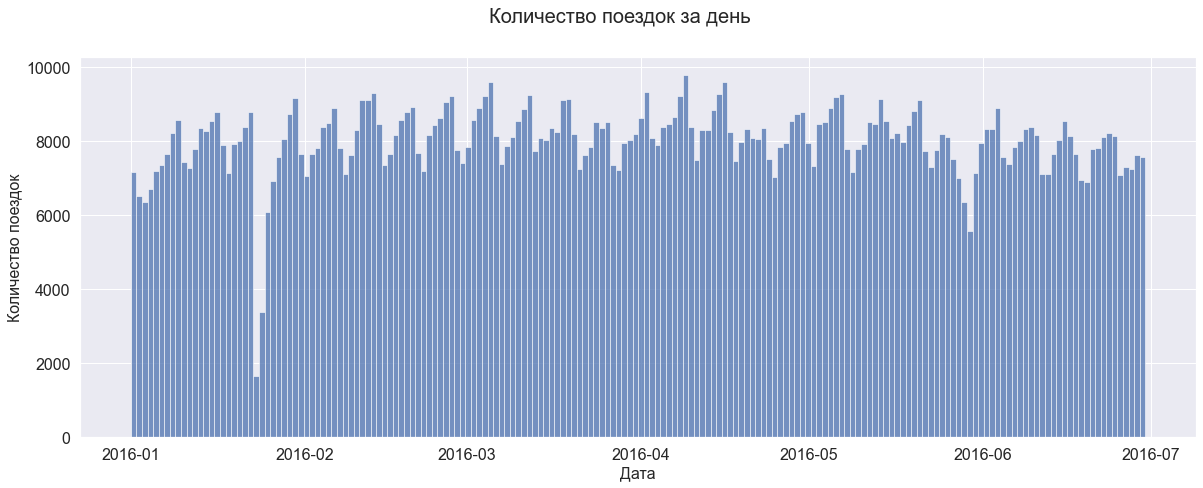

In [16]:
fig, ax = plt.subplots(figsize=(20, 7))
size = len(df['pickup_datetime'].dt.floor('d').value_counts())
sns.histplot(df['pickup_datetime'].dt.floor('d').sort_values(), bins=size)
fig.suptitle('Количество поездок за день', fontsize=20)
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Количество поездок', fontsize=16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()): # как заменить цикл?
    label.set_fontsize(16)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [17]:
df_pickuo_dist = df['pickup_datetime'].dt.floor('d').value_counts()
print(df_pickuo_dist[df_pickuo_dist < 6000])
anomaly1, anomaly2 = df_pickuo_dist[df_pickuo_dist < 6000].index[0], df_pickuo_dist[df_pickuo_dist < 6000].index[2]

2016-05-30    5570
2016-01-24    3383
2016-01-23    1648
Name: pickup_datetime, dtype: int64


Первый период это 23.01.2016 - власти запретили движение из-за снежной бури

Второй период менее значительный - это 30.05.2016, тогда был "День поминовения", какой-то праздник о военных. В этот день был парад, поэтому часть дорог была перекрыта.

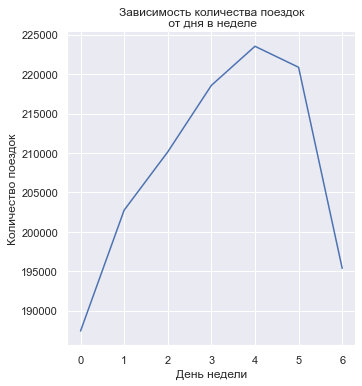

In [18]:
sns.relplot(y=df['pickup_datetime'].dt.dayofweek.value_counts().sort_index(),
            x=df['pickup_datetime'].dt.dayofweek.value_counts().sort_index().index, kind="line")
plt.title("Зависимость количества поездок\n от дня в неделе")
plt.xlabel("День недели")
plt.ylabel("Количество поездок")
plt.show()

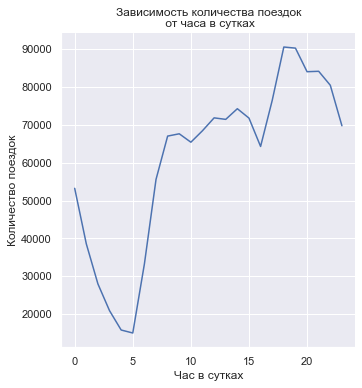

In [19]:
sns.relplot(y=df['pickup_datetime'].dt.hour.value_counts().sort_index(),
            x=df['pickup_datetime'].dt.hour.value_counts().sort_index().index, kind="line")
plt.title("Зависимость количества поездок\n от часа в сутках")
plt.xlabel("Час в сутках")
plt.ylabel("Количество поездок")
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [20]:
df_sorted = df.sort_values(by=['pickup_datetime'])

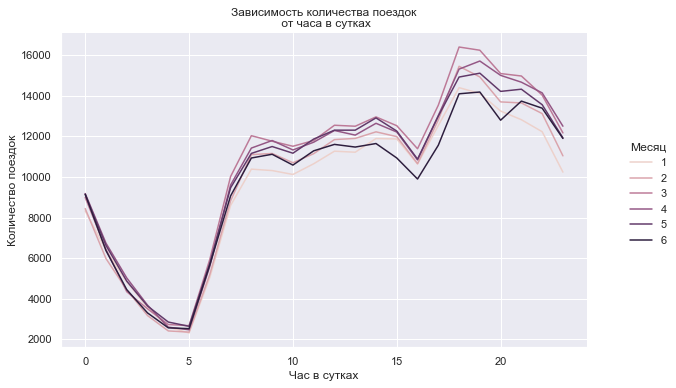

In [21]:
df_group = df_sorted.groupby(by=[df_sorted['pickup_datetime'].dt.hour, df_sorted['pickup_datetime'].dt.month]).count()
df_group.index.names = ['day', 'Месяц']
ax = sns.relplot(
    data=df_group, x="day", y="id",
    hue="Месяц", kind="line")
ax.fig.set_figwidth(10)
ax.fig.set_figheight(5)
plt.title("Зависимость количества поездок\n от часа в сутках")
plt.xlabel("Час в сутках")
plt.ylabel("Количество поездок")
plt.show()

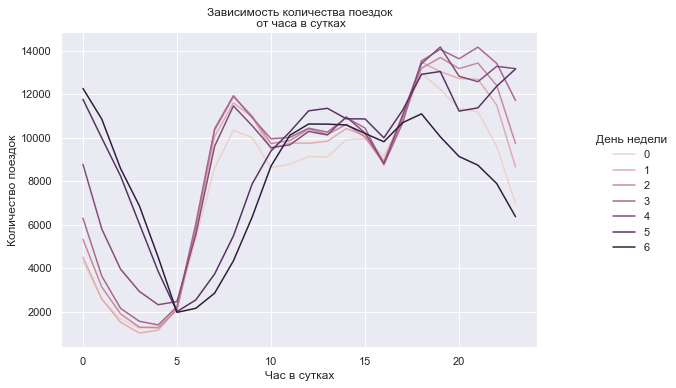

In [22]:
df_group = df_sorted.groupby(by=[df_sorted['pickup_datetime'].dt.hour, df_sorted['pickup_datetime'].dt.dayofweek]).count()
df_group.index.names = ['day', 'День недели']
ax = sns.relplot(
    data=df_group, x="day", y="id",
    hue="День недели", kind="line")
ax.fig.set_figwidth(10)
ax.fig.set_figheight(5)
plt.title("Зависимость количества поездок\n от часа в сутках")
plt.xlabel("Час в сутках")
plt.ylabel("Количество поездок")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Видим, что наибольшее количество поездок совершается в 4 день недели, и в целом распределение параболическое.

Что касается часа в сутках, видим, что наименьшее количество поездок около 5 часов утра, после чего происходит резкий скачок - все едут на работу, в течении дня нет каких то сильных изменений, ближе к вечеру опять рост - люди едут с работы, и к ночи начинает убывать к минимуму.

Что касается распределения по месяцыа, кажется, что в целом в 6 месяце было несколько меньше поездок, чем в остальных, возможно, это связано с тем, что в июне некоторые уходили в отпуск, и им не требовалось такси.

Если посмотреть на распределение по неделям, то тут зависимости сложнее. Хочется выделить несколько периодов: 

1) с 0 до 5 часов утра в среднем в выходные происходит сильно больше поездок, чем в будни

2) с 5 до 10 утра происходит абсолютно противоположная ситуация, ведь людям не надо ехать наработу

3) с 10 до 17 часов распределение примерно идентичные

4) с 17 до 0 часов в воскресенье опять же сильно меньше поездок, т.к. люди не возвращаются с работы

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

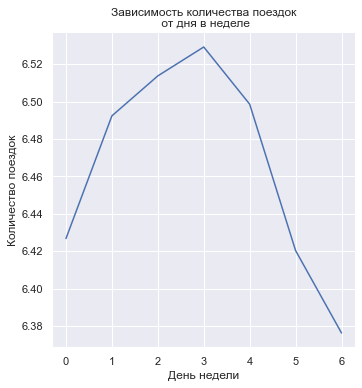

In [25]:
train_dayofweek = train.groupby(by=[train['pickup_datetime'].dt.dayofweek]).mean()
sns.relplot(data=train_dayofweek, x="pickup_datetime", y="log_trip_duration", kind="line")
plt.title("Зависимость количества поездок\n от дня в неделе")
plt.xlabel("День недели")
plt.ylabel("Количество поездок")
plt.show()

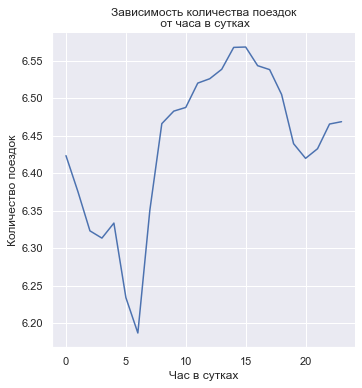

In [26]:
train_day = train.groupby(by=[train['pickup_datetime'].dt.hour]).mean()
sns.relplot(data=train_day, x="pickup_datetime", y="log_trip_duration", kind="line")
plt.title("Зависимость количества поездок\n от часа в сутках")
plt.xlabel("Час в сутках")
plt.ylabel("Количество поездок")
plt.show()

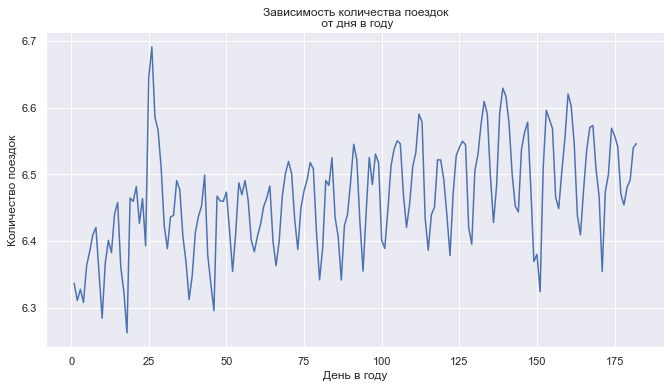

In [634]:
train_day_of_year = train.groupby(by=[train['pickup_datetime'].dt.day_of_year]).mean()
ax = sns.relplot(data=train_day_of_year, x="pickup_datetime", y="log_trip_duration", kind="line")
ax.fig.set_figwidth(10)
ax.fig.set_figheight(5)
plt.title("Зависимость количества поездок\n от дня в году")
plt.xlabel("День в году")
plt.ylabel("Количество поездок")
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

В целом графики похожи, но отличаются деталями, к примеру, в распределении по дню в неделе вершина параболы находится в 3 дне, а не в 4. Логично, что будут некоторые несоответсвия, ведь тут мы стром график лишь по какой то подвыборке, т.е. у нас меньше информации о генеральной совокупности, и мы хуже приближаем. В первый аномальный период у нас резко вырасло количество поездок, а вот второй видно довольно большое проседание. Это можно объяснить тем, что **ВСТАВИТЬ**. По последнему графику наблюдается небольшой тренд на повышение.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [28]:
train['weekday'] = train['pickup_datetime'].dt.dayofweek
train['month'] = train['pickup_datetime'].dt.month
train['hour'] = train['pickup_datetime'].dt.hour
train['anomaly1'] = 0
train.loc[train['pickup_datetime'].dt.floor('d') == anomaly1, 'anomaly1'] = 1
train['anomaly2'] = 0
train.loc[train['pickup_datetime'].dt.floor('d') == anomaly2, 'anomaly2'] = 1
train['day_of_year'] = train['pickup_datetime'].dt.day_of_year

In [29]:
test['weekday'] = test['pickup_datetime'].dt.dayofweek
test['month'] = test['pickup_datetime'].dt.month
test['hour'] = test['pickup_datetime'].dt.hour
test['anomaly1'] = 0
test.loc[test['pickup_datetime'].dt.floor('d') == anomaly1, 'anomaly1'] = 1
test['anomaly2'] = 0
test.loc[test['pickup_datetime'].dt.floor('d') == anomaly2, 'anomaly2'] = 1
test['day_of_year'] = test['pickup_datetime'].dt.day_of_year

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

Вещественным сделаем день в году, т.к. видим растущий тренд, остальные оставим категориальными.

Но немного поэкперементировав, нашёл, что если сделать день в году вещественным, то это даёт довольно ощутимый прирос качества. Также сделаем день недели вещественным, т.к. это также даёт хоть и небольшой, но прирост.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [31]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [59]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
cat_feat = ['month', 'hour', 'anomaly1', 'anomaly2', 'day_of_year']
X_cat = ohe.fit_transform(train[cat_feat])

numeric_feat = ['weekday']
scaler = StandardScaler()
X_num = scaler.fit_transform(train[numeric_feat])

X_train = np.concatenate((X_num, X_cat), axis=1)
y_train = train['log_trip_duration']

In [60]:
X_cat_test = ohe.transform(test[cat_feat])
X_num_test = scaler.transform(test[numeric_feat])

X_test = np.concatenate((X_num_test, X_cat_test), axis=1)
y_test = test['log_trip_duration']

In [61]:
model = Ridge()
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.7871298534822295, train: 0.7879583678464902'

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [62]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [57]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [58]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

Помимо манхетенна, видно 2 плотных скопления точек поодаль - два аэропорта: LaGuardia и John F. Kennedy.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [63]:
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [64]:
train['haversine'] = haversine_vectorize(train['pickup_longitude'],
                    train['pickup_latitude'],
                    train['dropoff_longitude'],
                    train['dropoff_latitude'])

In [65]:
test['haversine'] = haversine_vectorize(test['pickup_longitude'],
                    test['pickup_latitude'],
                    test['dropoff_longitude'],
                    test['dropoff_latitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [66]:
train['log_haversine'] = np.log1p(train['haversine'])
test['log_haversine'] = np.log1p(test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [67]:
np.corrcoef(train['log_haversine'], train['log_trip_duration'])

array([[1.        , 0.74994787],
       [0.74994787, 1.        ]])

In [68]:
np.corrcoef(train['haversine'], train['log_trip_duration'])

array([[1.        , 0.56540599],
       [0.56540599, 1.        ]])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

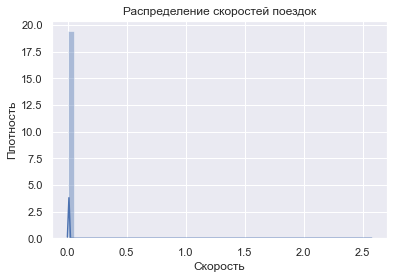

In [69]:
train['speed'] = train['haversine'] / (np.exp(train['log_trip_duration']) - 1)
sns.distplot(train['speed'])
plt.title("Распределение скоростей поездок")
plt.xlabel("Скорость")
plt.ylabel("Плотность")
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

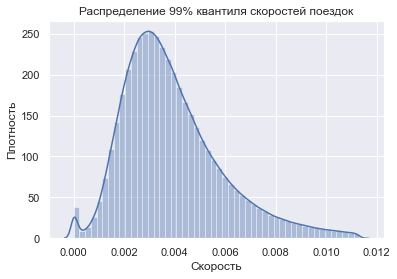

In [71]:
sns.distplot(train[train['speed'] < np.quantile(train['speed'], 0.99)]['speed'])
plt.title("Распределение 99% квантиля скоростей поездок")
plt.xlabel("Скорость")
plt.ylabel("Плотность")
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [67]:
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,month,hour,anomaly1,anomaly2,day_of_year,haversine,log_haversine,speed
1011257,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,844,6.739337,1,5,9,0,0,124,1.262394,0.816423,0.001496
178550,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,1001,6.909753,4,1,16,0,0,1,4.800996,1.758030,0.004796
551460,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,1048,6.955593,6,4,13,0,0,115,7.466398,2.136105,0.007124
1434271,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,784,6.665684,6,1,17,0,0,10,3.442706,1.491264,0.004391
1173610,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,732,6.597146,3,2,17,0,0,56,2.479505,1.246890,0.003387


In [72]:
grouped = train.groupby(by=['weekday', 'hour'], as_index=False).median()

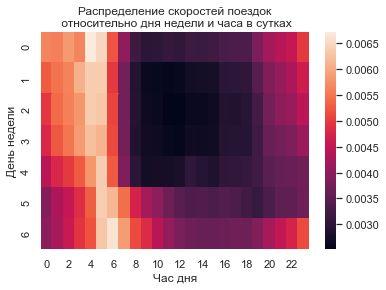

In [73]:
sns.heatmap(grouped.pivot('weekday', 'hour', 'speed'))
plt.title("Распределение скоростей поездок\n относительно дня недели и часа в сутках")
plt.xlabel("Час дня")
plt.ylabel("День недели")
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Как минимум, потому что мы заранее не знаем, какая скорсть будет у нашего автомобиля, а если бы и знали, то могли бы посчитать время, за которое приедем, ведь дистанцию мы знаем.

In [74]:
train = train.drop(['speed'], axis=1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Кажется, что максимальная скорость была в пн в 5 часов утра, и в вс в 6 часов утра.

Минимальная же во вт, ср, чт и пт примерно с 9 до 12 часов утра - как раз час пик, когда все едут на работу.

In [75]:
train['free_roads'] = 0
mask1 = (train['hour'].isin([5, 6])) & (train['weekday'].isin([5, 6]))
mask2 = (train['hour'].isin([4, 5])) & (train['weekday'].isin([0, 1, 2, 3]))
train.loc[mask1 | mask2, 'free_roads'] = 1

In [76]:
train['is_trafic_jams'] = 0
train.loc[(train['weekday'] <= 4) & (train['hour'] >= 5), 'is_trafic_jams'] = 1
train.loc[(train['weekday'] <= 2) & (train['hour'] >= 21), 'is_trafic_jams'] = 0

In [77]:
test['free_roads'] = 0
mask1 = (test['hour'].isin([5, 6])) & (test['weekday'].isin([5, 6]))
mask2 = (test['hour'].isin([4, 5])) & (test['weekday'].isin([0, 1, 2, 3]))
test.loc[mask1 | mask2, 'free_roads'] = 1

In [78]:
test['is_trafic_jams'] = 0
test.loc[(test['weekday'] <= 4) & (test['hour'] >= 5), 'is_trafic_jams'] = 1
test.loc[(train['weekday'] <= 2) & (test['hour'] >= 21), 'is_trafic_jams'] = 0

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [79]:
LaGuard_lat = np.ones(train.shape[0]) * -73.872611000000
LaGuard_long = np.ones(train.shape[0]) * 40.777250000000

train['start_LaGuard'] = 0
mask = haversine_vectorize(LaGuard_lat, LaGuard_long, train['pickup_longitude'], train['pickup_latitude']) < 1
train.loc[mask, 'start_LaGuard'] = 1

train['end_LaGuard'] = 0
mask = haversine_vectorize(LaGuard_lat, LaGuard_long, train['dropoff_longitude'], train['dropoff_latitude']) < 1
train.loc[mask, 'end_LaGuard'] = 1

In [80]:
LaGuard_lat = np.ones(test.shape[0]) * -73.872611000000
LaGuard_long = np.ones(test.shape[0]) * 40.777250000000

test['start_LaGuard'] = 0
mask = haversine_vectorize(LaGuard_lat, LaGuard_long, test['pickup_longitude'], test['pickup_latitude']) < 1
test.loc[mask, 'start_LaGuard'] = 1

test['end_LaGuard'] = 0
mask = haversine_vectorize(LaGuard_lat, LaGuard_long, test['dropoff_longitude'], test['dropoff_latitude']) < 1
test.loc[mask, 'end_LaGuard'] = 1

In [81]:
JFK_lat = np.ones(train.shape[0]) * -73.783122
JFK_long = np.ones(train.shape[0]) * 40.644169

train['start_JFK'] = 0
mask = haversine_vectorize(JFK_lat, JFK_long, train['pickup_longitude'], train['pickup_latitude']) < 1
train.loc[mask, 'start_JFK'] = 1

train['end_JFK'] = 0
mask = haversine_vectorize(JFK_lat, JFK_long, train['dropoff_longitude'], train['dropoff_latitude']) < 1
train.loc[mask, 'end_JFK'] = 1

In [82]:
JFK_lat = np.ones(test.shape[0]) * -73.783122
JFK_long = np.ones(test.shape[0]) * 40.644169

test['start_JFK'] = 0
mask = haversine_vectorize(JFK_lat, JFK_long, test['pickup_longitude'], test['pickup_latitude']) < 1
test.loc[mask, 'start_JFK'] = 1

test['end_JFK'] = 0
mask = haversine_vectorize(JFK_lat, JFK_long, test['dropoff_longitude'], test['dropoff_latitude']) < 1
test.loc[mask, 'end_JFK'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

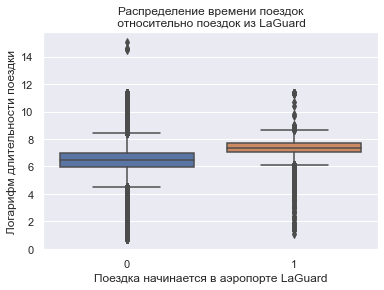

In [83]:
sns.boxplot(x="start_LaGuard", y="log_trip_duration", data=train)
plt.title("Распределение времени поездок\n относительно поездок из LaGuard")
plt.xlabel("Поездка начинается в аэропорте LaGuard")
plt.ylabel("Логарифм длительности поездки")
plt.show()

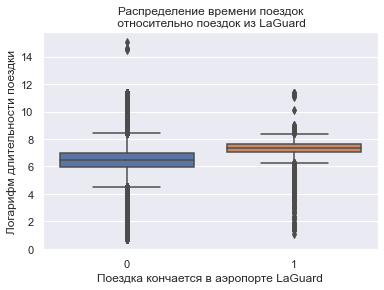

In [84]:
sns.boxplot(x="end_LaGuard", y="log_trip_duration", data=train)
plt.title("Распределение времени поездок\n относительно поездок из LaGuard")
plt.xlabel("Поездка кончается в аэропорте LaGuard")
plt.ylabel("Логарифм длительности поездки")
plt.show()

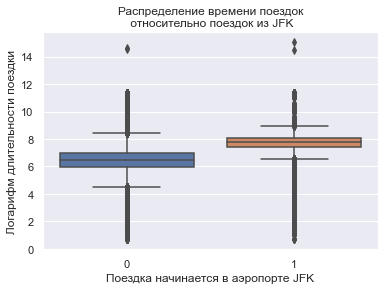

In [85]:
sns.boxplot(x="start_JFK", y="log_trip_duration", data=train)
plt.title("Распределение времени поездок\n относительно поездок из JFK")
plt.xlabel("Поездка начинается в аэропорте JFK")
plt.ylabel("Логарифм длительности поездки")
plt.show()

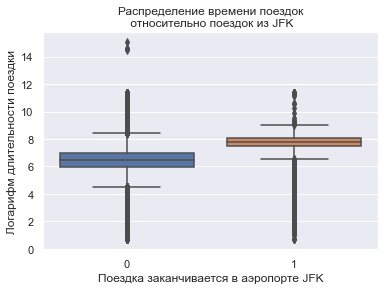

In [86]:
sns.boxplot(x="end_JFK", y="log_trip_duration", data=train)
plt.title("Распределение времени поездок\n относительно поездок из JFK")
plt.xlabel("Поездка заканчивается в аэропорте JFK")
plt.ylabel("Логарифм длительности поездки")
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Кажется, что разница между распределениями имеется, так что да, думаю, что это хорошие признаки.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lat_cnt, long_cnt, lat_start=40.701890, lat_end=40.798608, long_start=-74.017082, long_end=-73.937636):
        self.lat_boards = np.linspace(lat_start, lat_end, lat_cnt + 1)
        self.long_boards = np.linspace(long_start, long_end, long_cnt + 1)
        self.lat_cnt = lat_cnt
        self.long_cnt = long_cnt
        return 
    
    def fit_transform(self, data_, lat_column_start, long_column_start, lat_column_end, long_column_end):
        data = data_.copy()
        
        data['lat_start'] = -1
        for i in range(self.lat_cnt):
            mask = (data[lat_column_start] > self.lat_boards[i]) & (data[lat_column_start] <= self.lat_boards[i + 1])
            data.loc[mask, 'lat_start'] = i
            
        data['long_start'] = -1
        for i in range(self.long_cnt):
            mask = (data[long_column_start] > self.long_boards[i]) & (data[long_column_start] <= self.long_boards[i + 1])
            data.loc[mask, 'long_start'] = i
            
        mask = (data['long_start'] != -1) & (data['lat_start'] != -1)
        data['start_numb'] = -1
        data.loc[mask, 'start_numb'] = data[mask]['lat_start'] + data[mask]['long_start'] * self.lat_cnt
        data = data.drop(['lat_start', 'long_start'], axis=1)
        
        data['lat_end'] = -1
        for i in range(self.lat_cnt):
            mask = (data[lat_column_end] > self.lat_boards[i]) & (data[lat_column_end] <= self.lat_boards[i + 1])
            data.loc[mask, 'lat_end'] = i
            
        data['long_end'] = -1
        for i in range(self.long_cnt):
            mask = (data[long_column_end] > self.long_boards[i]) & (data[long_column_end] <= self.long_boards[i + 1])
            data.loc[mask, 'long_end'] = i
            
        mask = (data['long_end'] != -1) & (data['lat_end'] != -1)
        data['end_numb'] = -1
        data.loc[mask, 'end_numb'] = data[mask]['lat_end'] + data[mask]['long_end'] * self.lat_cnt
        data = data.drop(['lat_end', 'long_end'], axis=1)
        
        return data

In [88]:
map_trans = MapGridTransformer(4, 3)

In [89]:
transformed_train = map_trans.fit_transform(train,
                                            'pickup_latitude',
                                            'pickup_longitude',
                                            'dropoff_latitude',
                                            'dropoff_longitude')
transformed_test = map_trans.fit_transform(test,
                                            'pickup_latitude',
                                            'pickup_longitude',
                                            'dropoff_latitude',
                                            'dropoff_longitude')

In [90]:
def show_circles_on_map_array(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    mean_lat, mean_long = 0, 0
    for df in data:
        mean_lat += df[latitude_column].mean()
        mean_long += df[longitude_column].mean()
    mean_lat /= len(data)
    mean_long /= len(data)
    
    location = (mean_lat, mean_long)
    m = folium.Map(location=location)

    k = 0
    for df in data:
        for _, row in df.iterrows():
            folium.Circle(
                radius=100,
                location=(row[latitude_column], row[longitude_column]),
                color=color[k],
                fill_color=color[k],
                fill=True
            ).add_to(m)
        k += 1

    return m

In [92]:
dfs = [transformed_train[transformed_train['start_numb'] == i].sample(128) for i in range(12)]
show_circles_on_map_array(dfs, "pickup_latitude", "pickup_longitude", ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'blue', 'red', 'green', 'yellow', 'purple', 'orange'])

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [103]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
cat_feat = ['day_of_year', 'month', 'hour', 'anomaly1', 'anomaly2', 'free_roads', 'is_trafic_jams', 'start_LaGuard', 
            'end_LaGuard', 'start_JFK', 'end_JFK', 'start_numb', 'end_numb']
X_cat = ohe.fit_transform(transformed_train[cat_feat])

numeric_feat = ['weekday', 'haversine', 'log_haversine']
scaler = StandardScaler()
X_num = scaler.fit_transform(transformed_train[numeric_feat])

X_train = np.concatenate((X_num, X_cat), axis=1)
y_train = transformed_train['log_trip_duration']

In [104]:
X_cat_test = ohe.transform(transformed_test[cat_feat])
X_num_test = scaler.transform(transformed_test[numeric_feat])

X_test = np.concatenate((X_num_test, X_cat_test), axis=1)
y_test = transformed_test['log_trip_duration']

In [105]:
model = Ridge()
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.4720797310489335, train: 0.4710175755201657'

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

На первый взгляд кажется, что эти признаки далеко не так сильно влияют на время поездки, но некоторые закономерности всё же могут быть.

vendor_id - к примеру какой то вендор может использовать более современные машины, которые развивают большую скорось, а второй халатно относится к своим машинам, из-за чего происходят случаи, что машины ломаются во время поездки.

passenger_count - возможно, есть варианты, где водителю сначала нужно заехать за вторым пассажиром, из за чего общее время поездки увеличивается, или машины с большим количеством мест имееют специфический тип, что влияет на скорость.

store_and_fwd_flag - вероятно, этот флаг поможет нам найти какие-то неисправности приборов, т.е. обнаружить выбросы.

In [99]:
transformed_train['vendor_id'].value_counts()

2    546566
1    474484
Name: vendor_id, dtype: int64

In [102]:
len(transformed_train['passenger_count'].unique())

10

In [103]:
transformed_train['store_and_fwd_flag'].value_counts()

N    1015403
Y       5647
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

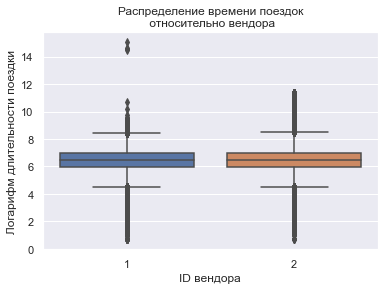

In [92]:
sns.boxplot(x="vendor_id", y="log_trip_duration", data=transformed_train)
plt.title("Распределение времени поездок\n относительно вендора")
plt.xlabel("ID вендора")
plt.ylabel("Логарифм длительности поездки")
plt.show()

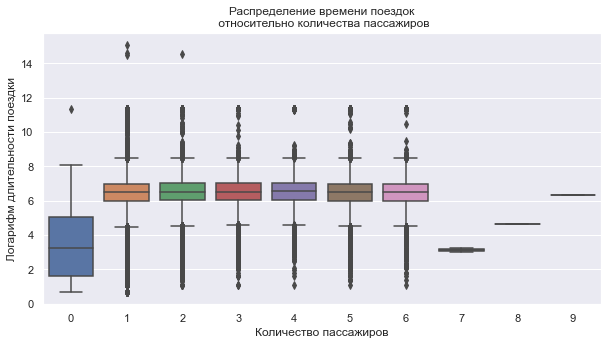

In [94]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="passenger_count", y="log_trip_duration", data=transformed_train, ax=ax)
plt.title("Распределение времени поездок\n относительно количества пассажиров")
plt.xlabel("Количество пассажиров")
plt.ylabel("Логарифм длительности поездки")
plt.show()

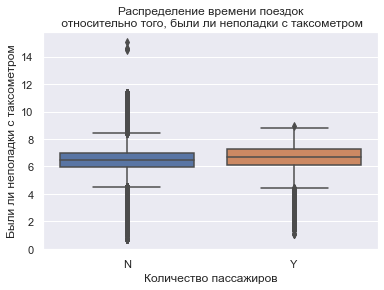

In [95]:
sns.boxplot(x="store_and_fwd_flag", y="log_trip_duration", data=transformed_train)
plt.title("Распределение времени поездок\n относительно того, были ли неполадки с таксометром")
plt.xlabel("Количество пассажиров")
plt.ylabel("Были ли неполадки с таксометром")
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [106]:
transformed_train['vendor_id'] -= 1
transformed_test['vendor_id'] -= 1

In [107]:
transformed_train['store_and_fwd_flag'] = np.where(transformed_train['store_and_fwd_flag'] == 'Y', 1, 0)
transformed_test['store_and_fwd_flag'] = np.where(transformed_test['store_and_fwd_flag'] == 'Y', 1, 0)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Видим, что распределение по vendor_id и passenger_count практически одинакоые, т.е. это очень слабые признаки, а вот распределение по store_and_fwd_flag хоть и немного, но отличаются, значит этот признак может принести немного пользы.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [114]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
cat_feat = ['day_of_year', 'month', 'hour', 'anomaly1', 'anomaly2', 'free_roads', 'is_trafic_jams', 'start_LaGuard',
            'end_LaGuard', 'start_JFK', 'end_JFK', 'start_numb', 'end_numb', 'vendor_id', 'store_and_fwd_flag',
            'passenger_count']
X_cat = ohe.fit_transform(transformed_train[cat_feat])

numeric_feat = ['weekday', 'haversine', 'log_haversine']
scaler = StandardScaler()
X_num = scaler.fit_transform(transformed_train[numeric_feat])

X_train = np.concatenate((X_num, X_cat), axis=1)
y_train = transformed_train['log_trip_duration']

In [115]:
X_cat_test = ohe.transform(transformed_test[cat_feat])
X_num_test = scaler.transform(transformed_test[numeric_feat])

X_test = np.concatenate((X_num_test, X_cat_test), axis=1)
y_test = transformed_test['log_trip_duration']

In [117]:
model = Ridge()
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.4716027313230976, train: 0.47054726367407634'

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Добавлял признаки последовательно, каждый раз ошибка чуть падала, поэтому оставим все.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [303]:
transformed_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,log_haversine,free_roads,is_trafic_jams,start_LaGuard,end_LaGuard,start_JFK,end_JFK,start_numb,end_numb
1011257,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,0,844,...,1.262394,0.816423,0,1,0,0,0,0,6,6
178550,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,0,1001,...,4.800996,1.758030,0,1,0,0,0,0,5,7
551460,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,0,1048,...,7.466398,2.136105,0,0,0,0,0,0,11,-1
1434271,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,0,784,...,3.442706,1.491264,0,0,0,0,0,0,4,6
1173610,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,0,732,...,2.479505,1.246890,0,1,0,0,0,0,6,7


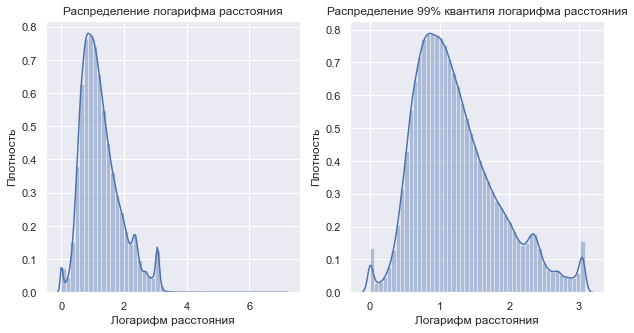

In [118]:
mask1 = transformed_train['log_haversine'] < np.quantile(transformed_train['log_haversine'], 0.99)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(transformed_train['log_haversine'], ax=ax1)
ax1.set_title("Распределение логарифма расстояния")
ax1.set_xlabel("Логарифм расстояния")
ax1.set_ylabel("Плотность")

sns.distplot(transformed_train[mask1]['log_haversine'], ax=ax2)
ax2.set_title("Распределение 99% квантиля логарифма расстояния")
ax2.set_xlabel("Логарифм расстояния")
ax2.set_ylabel("Плотность")
plt.show()

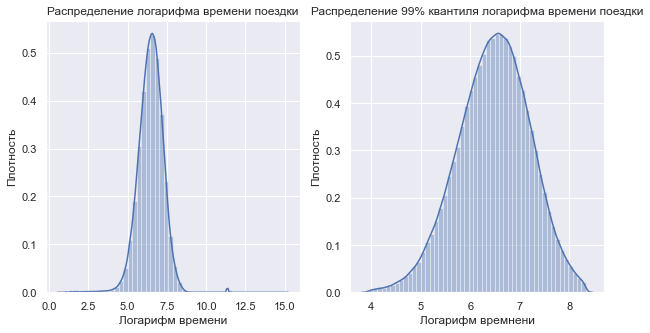

In [122]:
mask3_1 = transformed_train['log_trip_duration'] < np.quantile(transformed_train['log_trip_duration'], 0.995)
mask3_2 = transformed_train['log_trip_duration'] > np.quantile(transformed_train['log_trip_duration'], 0.005)
mask3 = mask3_1 & mask3_2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(transformed_train['log_trip_duration'], ax=ax1)
ax1.set_title("Распределение логарифма времени поездки")
ax1.set_xlabel("Логарифм времени")
ax1.set_ylabel("Плотность")

sns.distplot(transformed_train[mask3]['log_trip_duration'], ax=ax2)
ax2.set_title("Распределение 99% квантиля логарифма времени поездки")
ax2.set_xlabel("Логарифм времнени")
ax2.set_ylabel("Плотность")
plt.show()

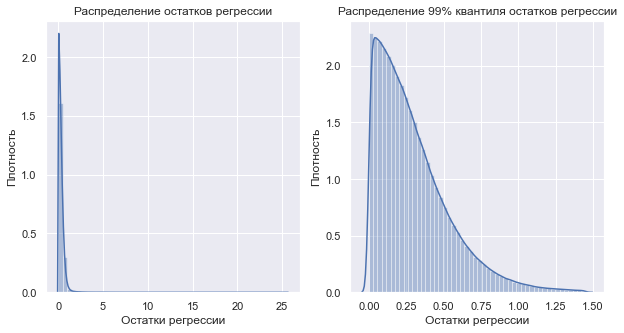

In [123]:
res = np.abs(model.predict(X_train) - y_train)

mask4 = res < np.quantile(res, 0.99)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(res, ax=ax1)
ax1.set_title("Распределение остатков регрессии")
ax1.set_xlabel("Остатки регрессии")
ax1.set_ylabel("Плотность")

sns.distplot(res[mask4], ax=ax2)
ax2.set_title("Распределение 99% квантиля остатков регрессии")
ax2.set_xlabel("Остатки регрессии")
ax2.set_ylabel("Плотность")
plt.show()

In [124]:
sum(mask4 & mask1  & mask3), len(y_train)

(997316, 1021050)

In [125]:
trans_train = transformed_train[mask4 & mask1  & mask3]
y_trans_train = y_train[mask4 & mask1  & mask3]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [126]:
cat_feat

['day_of_year',
 'month',
 'hour',
 'anomaly1',
 'anomaly2',
 'free_roads',
 'is_trafic_jams',
 'start_LaGuard',
 'end_LaGuard',
 'start_JFK',
 'end_JFK',
 'start_numb',
 'end_numb',
 'vendor_id',
 'store_and_fwd_flag',
 'passenger_count']

In [137]:
trans_train['passenger_count'].value_counts()

1    707318
2    143603
5     53284
3     40916
6     32907
4     19277
0         9
8         1
9         1
Name: passenger_count, dtype: int64

In [138]:
trans_train['start_numb'].value_counts()

 6     260490
 1     146748
 5     136711
-1      84081
 0      83149
 11     70187
 7      68054
 10     66275
 2      52155
 4      23282
 8       4631
 9       1436
 3        117
Name: start_numb, dtype: int64

In [132]:
trans_train['end_numb'].value_counts()

 6     234419
-1     134832
 1     125971
 5     125143
 0      78004
 11     75103
 7      67182
 10     66195
 2      50534
 4      24523
 8      10219
 9       4926
 3        265
Name: end_numb, dtype: int64

Посмотрев все категориальные (но не бинарные) признаки, видим, что маленькое значение у нас только в 8, 9 и 3 квадратах старта и окончания поездки, объединим их в один, а также у колчиества пассажиров.

In [155]:
trans_train.loc[trans_train['end_numb'].isin([9, 3]), 'end_numb'] = 8
transformed_test.loc[transformed_test['end_numb'].isin([9, 3]), 'end_numb'] = 8

trans_train.loc[trans_train['passenger_count'] >= 7, 'passenger_count'] = 0
transformed_test.loc[transformed_test['passenger_count'] >= 7, 'passenger_count'] = 0

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [158]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
cat_feat = ['month', 'hour', 'anomaly1', 'anomaly2', 'free_roads', 'is_trafic_jams', 'start_LaGuard', 'day_of_year',
            'end_LaGuard', 'start_JFK', 'end_JFK', 'start_numb', 'end_numb', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
X_cat = ohe.fit_transform(trans_train[cat_feat])

numeric_feat = ['weekday', 'haversine', 'log_haversine']
scaler = StandardScaler()
X_num = scaler.fit_transform(trans_train[numeric_feat])

X_train = np.concatenate((X_num, X_cat), axis=1)
y_train = trans_train['log_trip_duration']

In [159]:
X_cat_test = ohe.transform(transformed_test[cat_feat])
X_num_test = scaler.transform(transformed_test[numeric_feat])

X_test = np.concatenate((X_num_test, X_cat_test), axis=1)
y_test = transformed_test['log_trip_duration']

In [160]:
model = Ridge()
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.47932177801986764, train: 0.3770389722380003'

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [162]:
f'После: {X_train.shape[1]}, до: {len(cat_feat) + len(numeric_feat)}'

'После: 256, до: 19'

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [163]:
from sklearn.linear_model import Lasso

In [164]:
model = Lasso()
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.795081559205176, train: 0.7107973803920019'

Видим, что Ridge показывает себя сильно лучше

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
X_tr_tr, X_tr_test, y_tr_tr, y_tr_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [167]:
%%time
alphas = np.logspace(-5, 2, 10)
res_train = []
res_test = []
for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_tr_tr, y_tr_tr)
    predict = model.predict(X_tr_test)
    predict_train = model.predict(X_tr_tr)
    res_train.append(np.sqrt(((predict_train - y_tr_tr)**2).mean()))
    res_test.append(np.sqrt(((predict - y_tr_test)**2).mean()))
    
best_alpha = alphas[np.argmin(res_test)]
print(f'best val score: {np.min(res_test):.3f}, best alpha: {best_alpha:.3f}')

model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

best val score: 0.377, best alpha: 0.000
Wall time: 22min 8s


'test: 0.4793101345961973, train: 0.377045406343195'

In [168]:
res_train = []
res_test = []
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_tr_tr, y_tr_tr)
    predict = model.predict(X_tr_test)
    predict_train = model.predict(X_tr_tr)
    res_train.append(np.sqrt(((predict_train - y_tr_tr)**2).mean()))
    res_test.append(np.sqrt(((predict - y_tr_test)**2).mean()))
    
best_alpha = alphas[np.argmin(res_test)]
print(f'best val score: {np.min(res_test):.3f}, best alpha: {best_alpha:.3f}')

model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

best val score: 0.377, best alpha: 0.000


'test: 0.4793204522661229, train: 0.37703896580222895'

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [170]:
%%time
zero_coefs = []
score = []
for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_tr_tr, y_tr_tr)
    predict = model.predict(X_tr_test)
    score.append(np.sqrt(((predict - y_tr_test)**2).mean()))
    zero_coefs.append(np.sum(model.coef_ == 0))

Wall time: 11min 2s


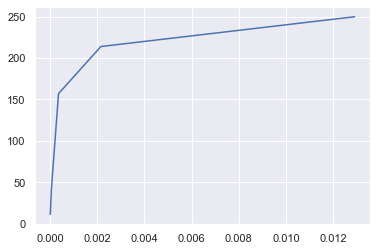

In [171]:
plt.plot(alphas[:3], zero_coefs[:5])

In [172]:
zero_coefs, score

([11, 43, 157, 214, 250, 255, 255, 256, 256, 256],
 [0.3767035737973103,
  0.37686622204577425,
  0.379670960228004,
  0.3883678873408006,
  0.4208156879957153,
  0.4517427313773733,
  0.6429718560699625,
  0.7108356464077688,
  0.7108356464077688,
  0.7108356464077688])

In [174]:
score[2] - score[1]

0.00280473818222976

Вот, сколько потеряем, если хотим, чтобы примерно половина занулилась

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Потому что наша модель может выявлять только линейные зависимости, здесь же зависимость скорее всего нелинейная, но, за счёт того, что мы делим её на категории, и после применяем one-hot метод, то довольно хорошо её приближаем.

In [151]:
trans_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,log_haversine,free_roads,is_trafic_jams,start_LaGuard,end_LaGuard,start_JFK,end_JFK,start_numb,end_numb
1011257,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,0,844,...,1.262394,0.816423,0,1,0,0,0,0,6,6
178550,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,0,1001,...,4.800996,1.758030,0,1,0,0,0,0,5,7
551460,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,0,1048,...,7.466398,2.136105,0,0,0,0,0,0,11,-1
1434271,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,0,784,...,3.442706,1.491264,0,0,0,0,0,0,4,6
1173610,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,0,732,...,2.479505,1.246890,0,1,0,0,0,0,6,7


In [175]:
grouped = trans_train.groupby(by=['start_numb', 'end_numb']).count()

In [176]:
%%time
indexes = grouped.sort_values(by=['id'], ascending=False)['id'][:100].index
indexes = np.array(list(map(np.array, indexes)))
a1 = trans_train['start_numb'].values.reshape(-1, 1) == indexes[:,0]
a2 = trans_train['end_numb'].values.reshape(-1, 1) == indexes[:,1]
mask = a1 & a2
trans_train['from_to'] = mask @ np.arange(1, mask.shape[1] + 1)

Wall time: 522 ms


In [177]:
a1 = transformed_test['start_numb'].values.reshape(-1, 1) == indexes[:,0]
a2 = transformed_test['end_numb'].values.reshape(-1, 1) == indexes[:,1]
mask = a1 & a2
transformed_test['from_to'] = mask @ np.arange(1, mask.shape[1] + 1)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [187]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
cat_feat = ['day_of_year', 'month', 'hour', 'anomaly1', 'anomaly2', 'free_roads', 'is_trafic_jams', 'start_LaGuard', 'end_LaGuard',
           'start_JFK', 'end_JFK', 'start_numb', 'end_numb', 'vendor_id', 'store_and_fwd_flag', 'from_to', 'passenger_count']
X_cat = ohe.fit_transform(trans_train[cat_feat])

numeric_feat = ['weekday', 'haversine', 'log_haversine']
scaler = StandardScaler()
X_num = scaler.fit_transform(trans_train[numeric_feat])

X_train = np.concatenate((X_num, X_cat), axis=1)
y_train = trans_train['log_trip_duration']

In [188]:
X_cat_test = ohe.transform(transformed_test[cat_feat])
X_num_test = scaler.transform(transformed_test[numeric_feat])

X_test = np.concatenate((X_num_test, X_cat_test), axis=1)
y_test = transformed_test['log_trip_duration']

In [193]:
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.4700193465356728, train: 0.36713886255986616'

In [190]:
model = Lasso(alpha=0)
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.4700188531233409, train: 0.367139103028095'

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [399]:
x0, y0 = 40.769146, -73.988550
x1, y1 = 40.774789, -73.984412
x2, y2 = 40.766729, -73.982854
x_2new, y2_new = x2 - x0, y2 - y0
x_1new, y1_new = x1 - x0, y1 - y0
A = np.array([[x_1new, y1_new], [x_2new, y2_new]])

In [576]:
basis_1 = np.array([x_1new, y1_new]) / np.sqrt(x_1new**2 + y1_new**2)
basis_2 = np.array([x_2new, y2_new]) / np.sqrt(x_2new**2 + y2_new**2)

In [577]:
basis = np.concatenate((basis_1.reshape(2, 1), basis_2.reshape(2, 1)), axis=1).T
# матрица перехода от стандартного базика к манхетонскому

In [584]:
def new_to_old(new_coord):
    tmp = new_coord @ basis
    tmp[:,0] += x0
    tmp[:,1] += y0
    return tmp

def old_to_new(old_coord):
    old_coord[:,0] -= x0
    old_coord[:,1] -= y0
    return old_coord @ np.linalg.inv(basis)


In [585]:
x_arr1 = np.linspace(0, (40.774789 - 40.769146) * 10, 10)           # проверим, что векторы, коллинеарные новым базисным
y_arr1 = np.array([0]*10)                                           # действительно коллинеарны улицам манхетенна
y_arr2 = np.linspace(0, (-73.984412 - -73.988550) * 10, 10)
x_arr2 = np.array([0]*10)
y_arr = np.concatenate((y_arr1.reshape(10, 1), y_arr2.reshape(10, 1)), axis=0)
x_arr = np.concatenate((x_arr1.reshape(10, 1), x_arr2.reshape(10, 1)), axis=0)
new_coord = np.concatenate((x_arr.reshape(20, 1), y_arr.reshape(20, 1)), axis=1)
new_coord

array([[0.        , 0.        ],
       [0.00627   , 0.        ],
       [0.01254   , 0.        ],
       [0.01881   , 0.        ],
       [0.02508   , 0.        ],
       [0.03135   , 0.        ],
       [0.03762   , 0.        ],
       [0.04389   , 0.        ],
       [0.05016   , 0.        ],
       [0.05643   , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.00459778],
       [0.        , 0.00919556],
       [0.        , 0.01379333],
       [0.        , 0.01839111],
       [0.        , 0.02298889],
       [0.        , 0.02758667],
       [0.        , 0.03218444],
       [0.        , 0.03678222],
       [0.        , 0.04138   ]])

In [586]:
(old_to_new(new_to_old(new_coord)) - new_coord <= 1e-14).all()

True

In [587]:
tmp = new_to_old(new_coord)
pd_to_check = pd.DataFrame(data={'x':tmp[:,0], 'y':tmp[:,1]})
show_circles_on_map(pd_to_check, 'x', 'y', 'blue')

<img src="manh.png" style="width: 400px">

In [608]:
new_drop = old_to_new(trans_train[['dropoff_latitude', 'dropoff_longitude']].values)
new_pick = old_to_new(trans_train[['pickup_latitude', 'pickup_longitude']].values)

In [609]:
dr_lat = new_drop[:,0]
dr_log = new_drop[:, 1]
p_lat = new_pick[:, 0]
p_log = new_pick[:, 1]

In [610]:
lat_dist = haversine_vectorize(p_log, p_lat, p_log, dr_lat)
long_dist = haversine_vectorize(p_log, p_lat, dr_log, p_lat)

In [611]:
trans_train['manhattan'] = lat_dist + long_dist
trans_train['log_manhattan'] = np.log1p(trans_train['manhattan'])

In [630]:
new_drop = old_to_new(transformed_test[['dropoff_latitude', 'dropoff_longitude']].values)
new_pick = old_to_new(transformed_test[['pickup_latitude', 'pickup_longitude']].values)

dr_lat = new_drop[:,0]
dr_log = new_drop[:, 1]
p_lat = new_pick[:, 0]
p_log = new_pick[:, 1]

lat_dist = haversine_vectorize(p_log, p_lat, p_log, dr_lat)
long_dist = haversine_vectorize(p_log, p_lat, dr_log, p_lat)

transformed_test['manhattan'] = lat_dist + long_dist
transformed_test['log_manhattan'] = np.log1p(transformed_test['manhattan'])

In [612]:
trans_train['manhattan'].to_frame().corrwith(trans_train['log_trip_duration'])

manhattan    0.664353
dtype: float64

In [613]:
trans_train['log_manhattan'].to_frame().corrwith(trans_train['log_trip_duration'])

log_manhattan    0.797846
dtype: float64

In [614]:
trans_train['haversine'].to_frame().corrwith(trans_train['log_trip_duration'])

haversine    0.664505
dtype: float64

In [615]:
trans_train['log_haversine'].to_frame().corrwith(trans_train['log_trip_duration'])

log_haversine    0.77991
dtype: float64

Повысилось!!!!

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [616]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
cat_feat = ['day_of_year', 'month', 'hour', 'anomaly1', 'anomaly2', 'free_roads', 'is_trafic_jams', 'start_LaGuard', 'end_LaGuard',
           'start_JFK', 'end_JFK', 'start_numb', 'end_numb', 'vendor_id', 'store_and_fwd_flag', 'from_to', 'passenger_count']
X_cat = ohe.fit_transform(trans_train[cat_feat])

numeric_feat = ['weekday', 'haversine', 'log_haversine', 'manhattan', 'log_manhattan']
scaler = StandardScaler()
X_num = scaler.fit_transform(trans_train[numeric_feat])

X_train = np.concatenate((X_num, X_cat), axis=1)
y_train = trans_train['log_trip_duration']

In [631]:
X_cat_test = ohe.transform(transformed_test[cat_feat])
X_num_test = scaler.transform(transformed_test[numeric_feat])

X_test = np.concatenate((X_num_test, X_cat_test), axis=1)
y_test = transformed_test['log_trip_duration']

In [632]:
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
f'test: {np.sqrt(((predict - y_test)**2).mean())}, train: {np.sqrt(((predict_train - y_train)**2).mean())}'

'test: 0.4495910756466506, train: 0.3461108419612056'

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">